### Problem Statement:

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donorsare supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFShas been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They arecollaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be6(in Indonesian Rupiah), while, for the loan amount of 10(in Indonesian Rupiah), the payback amount should be 12(in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.











### Exercise: 
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

Points to Remember:

•  There are no null values in the dataset. 
•  There may be some customers with no loan history.
•  The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
•  For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation. 
•  You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,6/17/2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,6/12/2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,7/29/2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,7/25/2016


In [3]:
#checking shape
df.shape


(209593, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

observation:

    1. Unnamed 0 is unnecessary dataset with unique value so lets it drop.
    
    2. Target feature is label and have integer dataset but in binary form so it is classification problem.
    
    3. pcircle is unique value so frop it.
    
    4. pdate is a object datatype. Need to convert in in date format.

In [6]:
#change pdate datatype
df['pdate']=pd.to_datetime(df['pdate'])

In [7]:
df['p_day']=df['pdate'].dt.day
df['p_month']=df['pdate'].dt.month
df['p_year']=df['pdate'].dt.year

df.drop(['pdate'],axis=1,inplace=True)

### Checking Null:

In [8]:
null_val= df.isna().sum().any()
null_val

False

There are no Null values are present in the total dataset.

### Statistical Matrix Evaluation:

In [9]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,p_day,p_month,p_year
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.0
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321,2016.0
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435,0.0
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000,2016.0
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000,2016.0
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000,2016.0
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000,2016.0
max,209593.000000,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000,2016.0


In [10]:
df.describe(include=object)

,msisdn,pcircle
count,209593,209593
unique,186243,1
top,04581I85330,UPW
freq,7,209593


1. Null is not present.

2. Seems outliers are present as there  is a different between 75% and max of some feature.

3. All p_year is single unique value so lets drop year column.

4. some feature has a lot of difference between 75% and maximum value. seems outliers are present in the dataset.

5. some features has negative values in minimum column. They are aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_data_ma,last_rech_date_da, medianmarechprebal90, medianmarechprebal30. lets explore those columns further.

### Drop unnecessary data:

In [11]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [12]:
df.drop(['Unnamed: 0', 'p_year','pcircle'],axis=1,inplace=True)

### Checking duplicate:

In [13]:
df.duplicated().sum()

1

In [14]:
df.duplicated('msisdn').sum()

23350

according to given dataset 1 row with completely duplicate values of all features.
and there are 23350 rows with duplicate mobile number. Seems same mobile number is switch to othe customers.

### Removal of Negative values:

In [15]:
df['aon'].describe()

count    209593.000000
mean       8112.343445
std       75696.082531
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755200
Name: aon, dtype: float64

In [16]:
print( "Maximum value of 'aon' in years :", 999860/365)

Maximum value of 'aon' in years : 2739.3424657534247


Maximum value of 'aon' in years : 2739.34 year which is not possible at all.

In [17]:
print(" No of entries with negetive aon value: ")
df[df['aon']<0].value_counts().sum()

 No of entries with negetive aon value: 


1539

In [18]:
df['aon']=abs(df['aon'])
df['aon'].describe()

count    209593.000000
mean       8112.808718
std       75696.032666
min           1.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755200
Name: aon, dtype: float64

In [19]:
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

In [20]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,p_day,p_month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,8112.808718,5381.431293,6082.544140,2715.376558,3509.497148,3756.125844,3712.204801,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,0.330519,75696.032666,9220.606472,10918.796572,4294.257439,5754.630600,53905.872857,53374.833299,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,999171.809400,55000.000000,203.000000,...,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


### Observations:

1. All negative min value except medianmarechprebal90, medianmarechprebal30 are deleted by replacing with abs of corresponding values.
2. medianmarechprebal90, medianmarechprebal30 are still negative. Let's explore this.


### Explore medianmarechprebal90, medianmarechprebal30:

..medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)**

..medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

In [21]:
df['medianmarechprebal30'].describe()

count    209593.000000
mean       3851.927942
std       54006.374433
min        -200.000000
25%          11.000000
50%          33.900000
75%          83.000000
max      999479.419300
Name: medianmarechprebal30, dtype: float64

### Explore maxamnt_loans30 and maxamnt_loans90:

maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days

maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days

In [22]:
df['maxamnt_loans30'].describe()

count    209593.000000
mean        274.658747
std        4245.264648
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       99864.560860
Name: maxamnt_loans30, dtype: float64

In [23]:
df['maxamnt_loans90'].describe()

count    209593.000000
mean          6.703134
std           2.103864
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max          12.000000
Name: maxamnt_loans90, dtype: float64

In [24]:
df['maxamnt_loans90'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [25]:
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

### Final data after cleaning:

In [26]:
df.shape

(209593, 36)

In [27]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'p_day', 'p_month'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn']}

In [28]:
float_num_features= ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 
               'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
               'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 
               'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 
               'payback30', 'payback90']
int_num_features= ['last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 
                   'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 
                   'p_day', 'p_month']
cat_features= ['msisdn']

### 1. Exploratory Data Analysis(EDA):

In [29]:
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

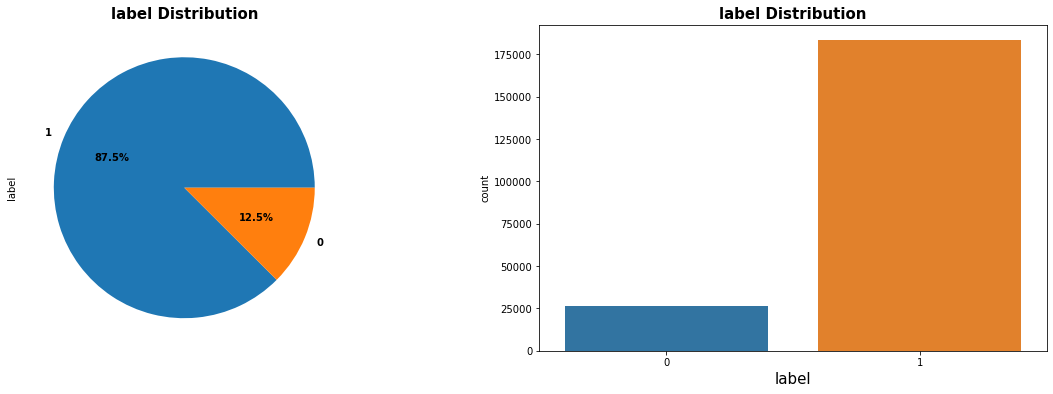

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,6))

df['label'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('label Distribution', fontsize=15,fontweight ='bold')
sns.countplot('label',data=df ,ax=ax[1])
ax[1].set_title('label Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('label',fontsize=15)
plt.show()

Here label 1 indicates that the loan has been payed i.e Non-defaulter, while, Label '0 indicates that the loan has not been payed i.e. defaulter.'

### Exploration of different features with label:

For p_day:

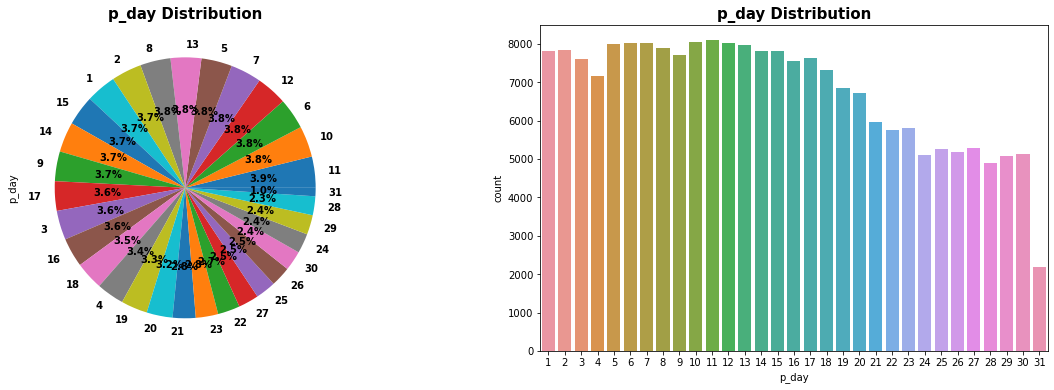

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,6))

df['p_day'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('p_day Distribution', fontsize=15,fontweight ='bold')
sns.countplot('p_day',data=df,ax=ax[1])
ax[1].set_title('p_day Distribution',fontsize=15,fontweight ='bold')
plt.show()

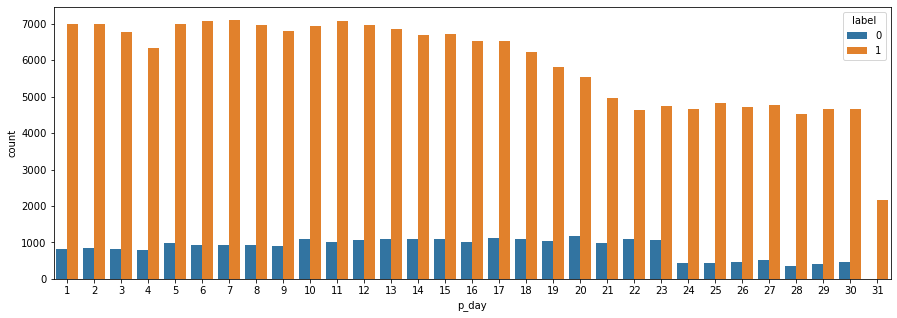

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x='p_day',data=df, hue= 'label')
plt.show()

### For payback30:

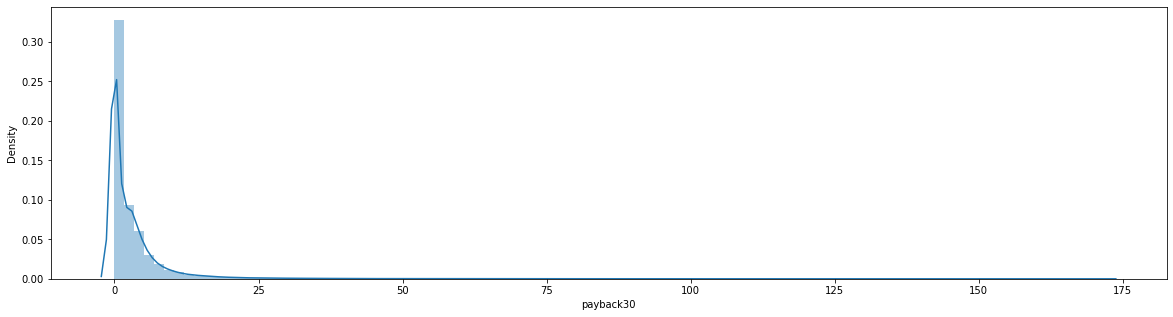

In [33]:
plt.figure(figsize=(20,5))
sns.distplot(df['payback30'], bins=100)
plt.show()

### For p_month:

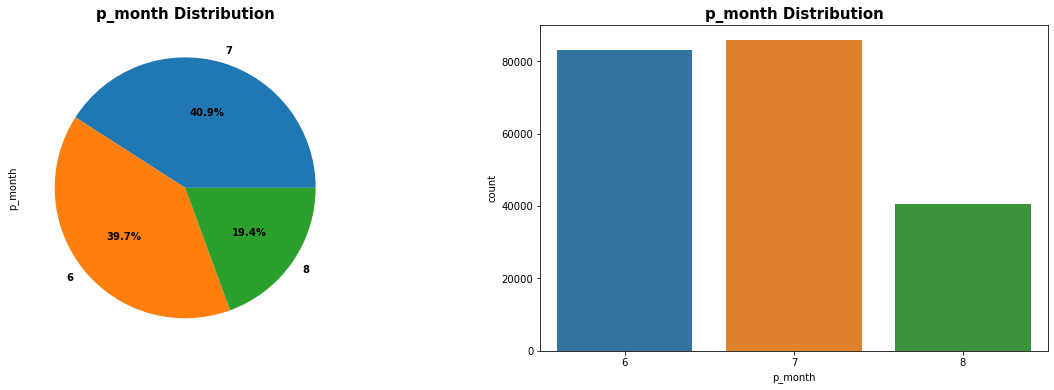

In [34]:

f,ax=plt.subplots(1,2,figsize=(20,6))

df['p_month'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('p_month Distribution', fontsize=15,fontweight ='bold')
sns.countplot('p_month',data=df,ax=ax[1])
ax[1].set_title('p_month Distribution',fontsize=15,fontweight ='bold')
plt.show()

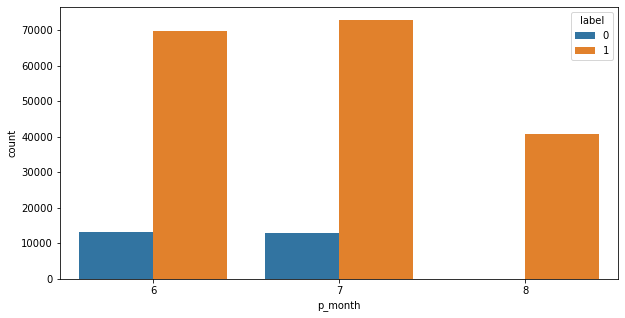

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='p_month',data=df, hue= 'label')
plt.show()

In [36]:
pd.crosstab([df.p_month],df["label"],margins=True)

label,0,1,All
p_month,,,
6,13261,69893,83154
7,12901,72864,85765
8,0,40674,40674
All,26162,183431,209593


### For maxamnt_loans30:

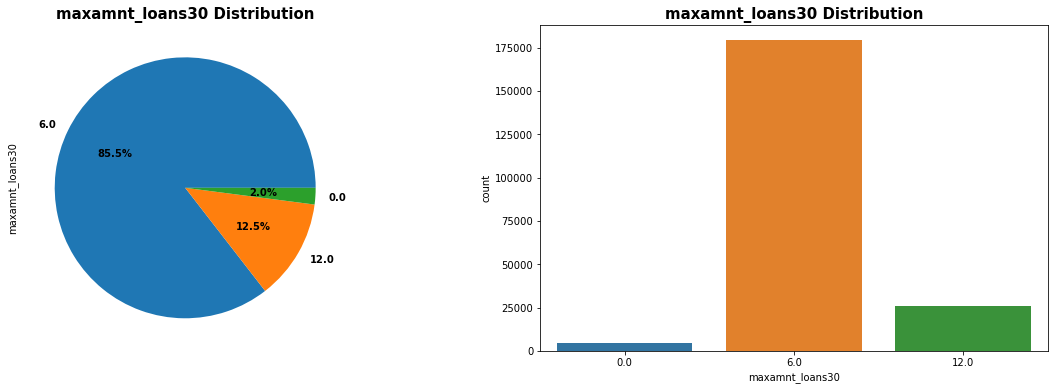

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,6))

df['maxamnt_loans30'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('maxamnt_loans30 Distribution', fontsize=15,fontweight ='bold')
sns.countplot('maxamnt_loans30',data=df,ax=ax[1])
ax[1].set_title('maxamnt_loans30 Distribution',fontsize=15,fontweight ='bold')
plt.show()

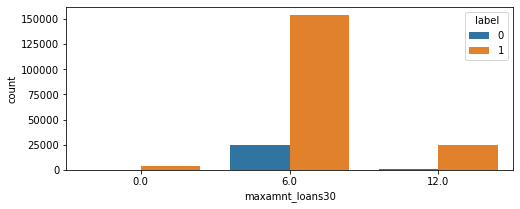

In [38]:
plt.figure(figsize=(8,3))
sns.countplot(x='maxamnt_loans30',data=df, hue= 'label')
plt.show()

In [39]:
pd.crosstab([df.maxamnt_loans30],df["label"],margins=True)

label,0,1,All
maxamnt_loans30,,,
0.0,129,4162,4291
6.0,25013,154180,179193
12.0,1020,25089,26109
All,26162,183431,209593


1.Maximum number of people had taken maxamnt_loans30 equal to 6 as the loan amount and the the percentage is 85.5%.
2. The number of people had not taken loan in last 30 days is 4291 which is 2.0%.
3. Obviously maximum defaulter are from maxamnt_loans30 = 6 group.

### For maxamnt_loans90:

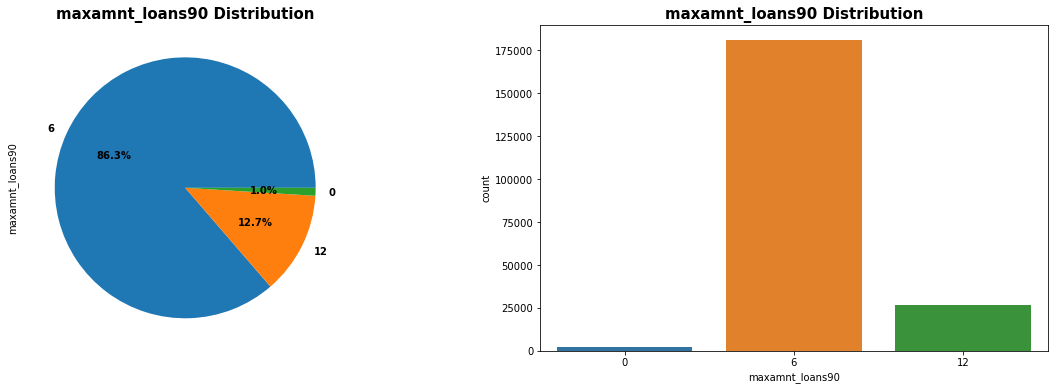

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,6))

df['maxamnt_loans90'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('maxamnt_loans90 Distribution', fontsize=15,fontweight ='bold')
sns.countplot('maxamnt_loans90',data=df,ax=ax[1])
ax[1].set_title('maxamnt_loans90 Distribution',fontsize=15,fontweight ='bold')
plt.show()

In [41]:
pd.crosstab([df.maxamnt_loans90],df["label"],margins=True)

label,0,1,All
maxamnt_loans90,,,
0,0,2043,2043
6,25140,155805,180945
12,1022,25583,26605
All,26162,183431,209593


### Observations:
1. Maximum number of people had taken maxamnt_loans90 equal to 6 as the loan amount and the the percentage is 86.3%.
2. The number of people had not taken loan in last 90 days is 2043 which is 1.0%.
3. Obviously maximum defaulter are from maxamnt_loans90 = 6 group.
4. For maxamnt_loans30= 0, there are defaulter. But for maxamnt_loans90= 0, there are no defaulter.

### For medianamnt_loans30:

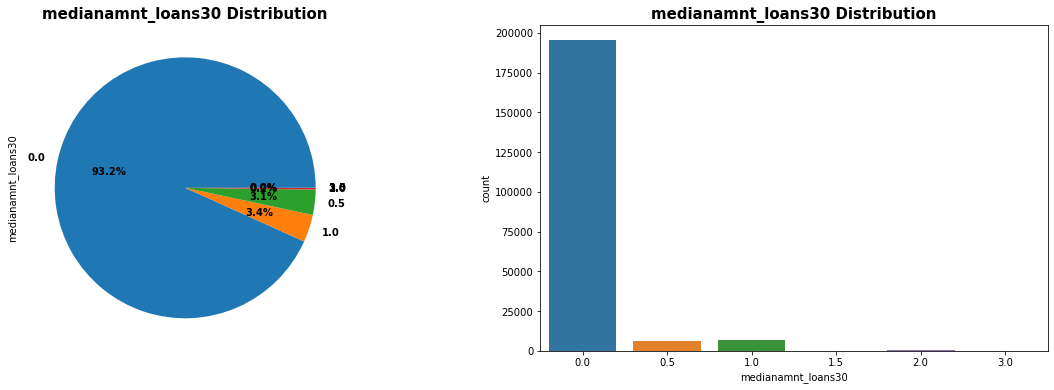

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,6))

df['medianamnt_loans30'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('medianamnt_loans30 Distribution', fontsize=15,fontweight ='bold')
sns.countplot('medianamnt_loans30',data=df,ax=ax[1])
ax[1].set_title('medianamnt_loans30 Distribution',fontsize=15,fontweight ='bold')
plt.show()

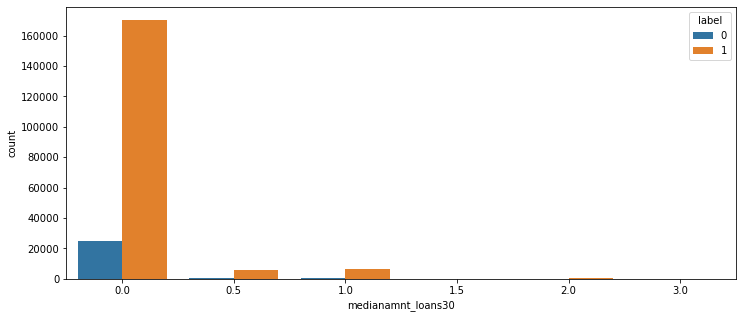

In [43]:
plt.figure(figsize=(12,5))
sns.countplot(x='medianamnt_loans30',data=df, hue= 'label')
plt.show()

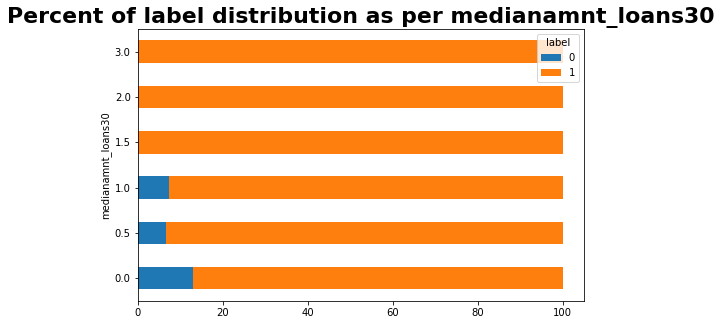

In [44]:
table= pd.crosstab(df['medianamnt_loans30'], df['label'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True, figsize=(8,5))
plt.title('Percent of label distribution as per medianamnt_loans30', fontsize=22, fontweight='bold')
plt.show()

In [45]:
pd.crosstab([df.medianamnt_loans30],df["label"],margins=True)

label,0,1,All
medianamnt_loans30,,,
0.0,25202,170243,195445
0.5,440,6098,6538
1.0,520,6629,7149
1.5,0,38,38
2.0,0,420,420
3.0,0,3,3
All,26162,183431,209593


1. Maximum medianamnt_loans30 that is Median of amounts of loan taken by the user in last 30 days is 0.0.
2. No defaulter for medianamnt_loans30 equal to 1.5,2.0,3.0.

### For medianamnt_loans90:

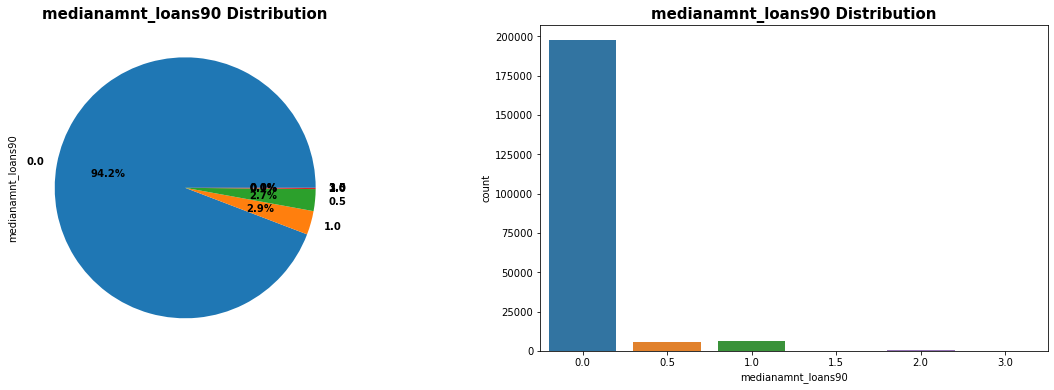

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,6))

df['medianamnt_loans90'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('medianamnt_loans90 Distribution', fontsize=15,fontweight ='bold')
sns.countplot('medianamnt_loans90',data=df,ax=ax[1])
ax[1].set_title('medianamnt_loans90 Distribution',fontsize=15,fontweight ='bold')
plt.show()

In [47]:
pd.crosstab([df.medianamnt_loans90],df["label"],margins=True)

label,0,1,All
medianamnt_loans90,,,
0.0,25230,172194,197424
0.5,447,5221,5668
1.0,485,5687,6172
1.5,0,19,19
2.0,0,307,307
3.0,0,3,3
All,26162,183431,209593


1. Maximum medianamnt_loans90 that is Median of amounts of loan taken by the user in last 90 days is 0.0.
2. No defaulter for medianamnt_loans90 equal to 1.5,2.0,3.0.

### For last_rech_amt_ma:

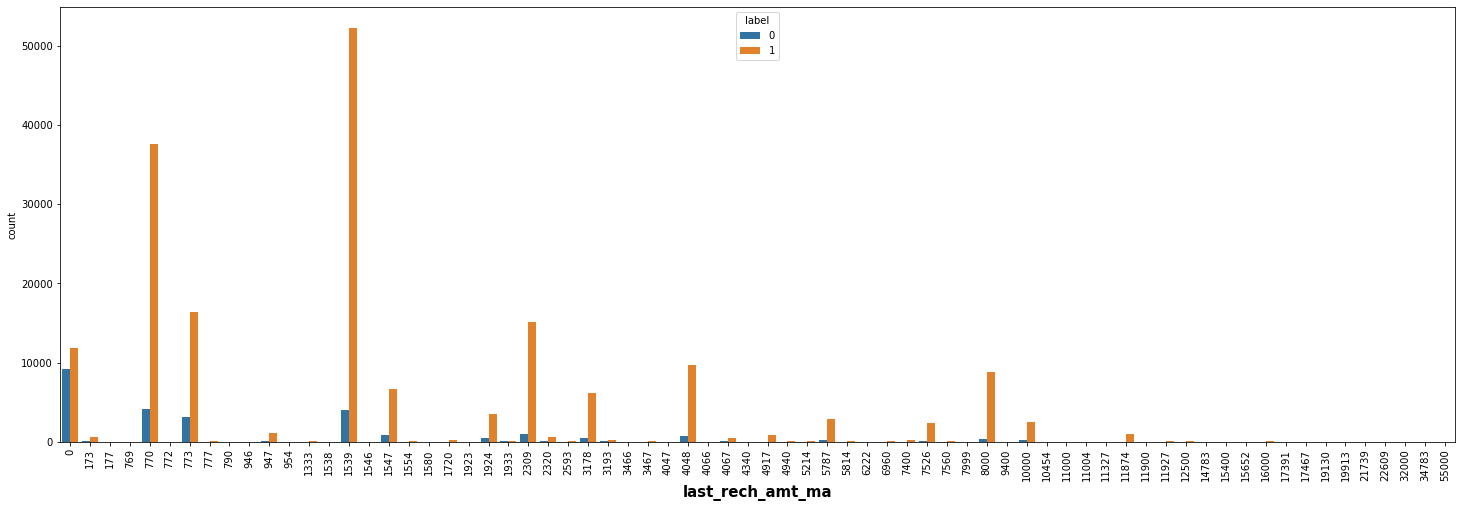

In [48]:
plt.figure(figsize=(25,8))
sns.countplot(x='last_rech_amt_ma',data=df, hue= 'label')
plt.xticks(rotation=90)
plt.xlabel("last_rech_amt_ma", fontweight= 'bold', fontsize=15)
plt.show()

1. Amount of last recharge of main account is maximum for 770, 1539.
2. Max defaulter are from last_rech_amt_ma=0.

### For cnt_da_rech90:

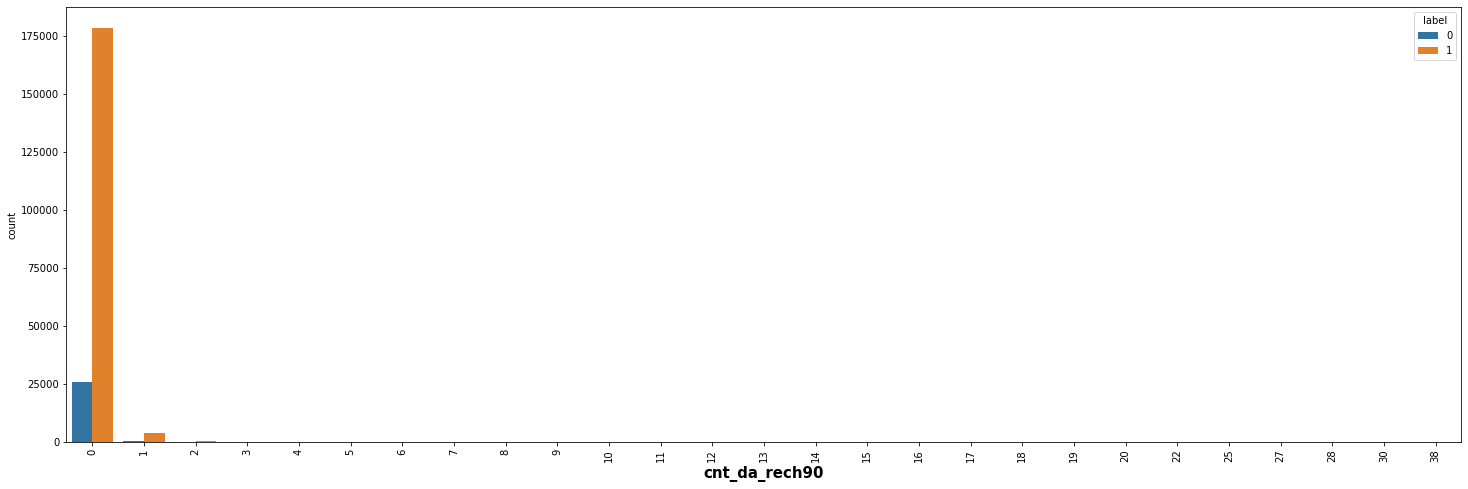

In [49]:
plt.figure(figsize=(25,8))
sns.countplot(x='cnt_da_rech90',data=df, hue= 'label')
plt.xticks(rotation=90)
plt.xlabel("cnt_da_rech90", fontweight= 'bold', fontsize=15)
plt.show()

### For cnt_loans30:

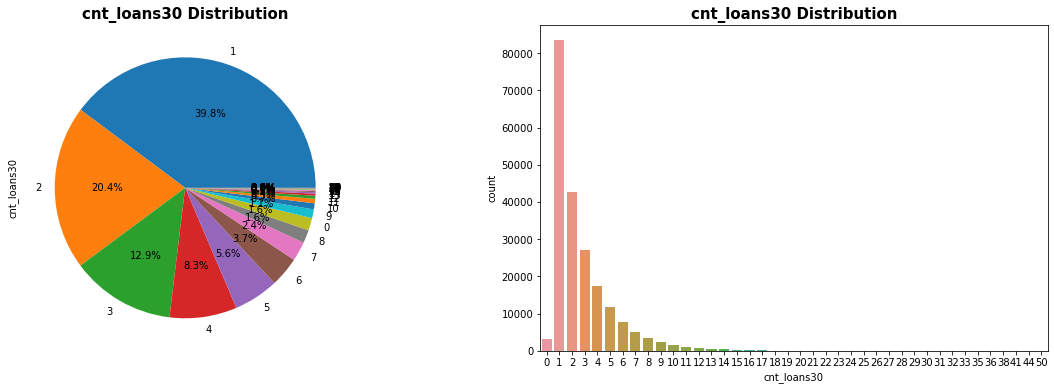

In [50]:
f,ax=plt.subplots(1,2,figsize=(20,6))

df['cnt_loans30'].value_counts().plot.pie(autopct='%3.1f%%',  ax=ax[0])
ax[0].set_title('cnt_loans30 Distribution', fontsize=15,fontweight ='bold')
sns.countplot('cnt_loans30',data=df,ax=ax[1])
ax[1].set_title('cnt_loans30 Distribution',fontsize=15,fontweight ='bold')
plt.show()

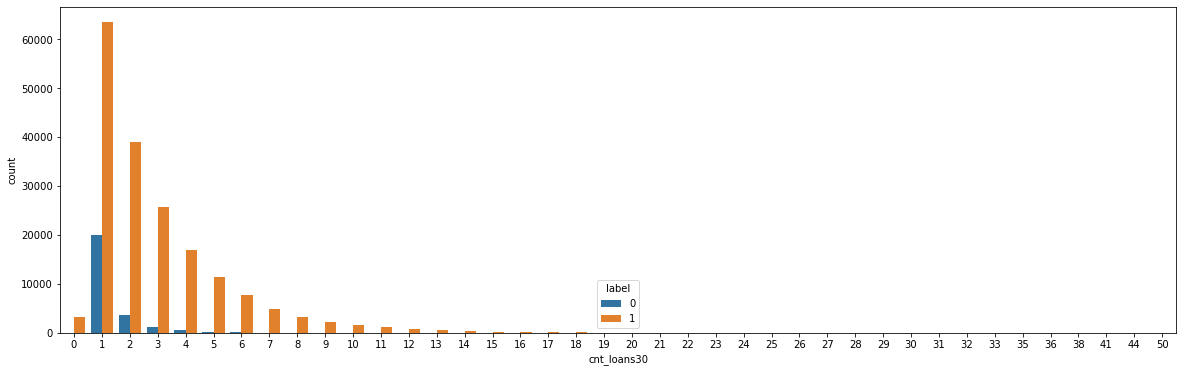

In [51]:
plt.figure(figsize=(20,6))
sns.countplot(x='cnt_loans30',data=df, hue= 'label')
plt.show()

Maximum number of loans taken by user in last 30 days is 1.

### For amnt_loans30:

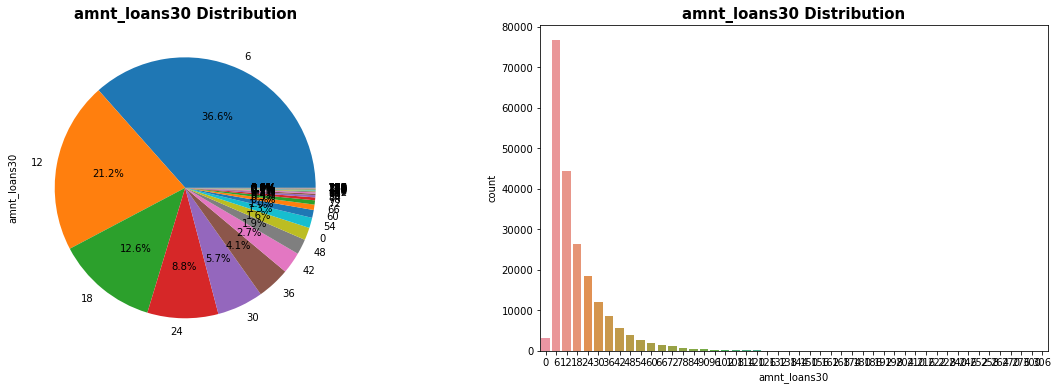

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,6))

df['amnt_loans30'].value_counts().plot.pie(autopct='%3.1f%%',  ax=ax[0])
ax[0].set_title('amnt_loans30 Distribution', fontsize=15,fontweight ='bold')
sns.countplot('amnt_loans30',data=df,ax=ax[1])
ax[1].set_title('amnt_loans30 Distribution',fontsize=15,fontweight ='bold')
plt.show()

### Relation between different features and labels(Multivariate Analysis):

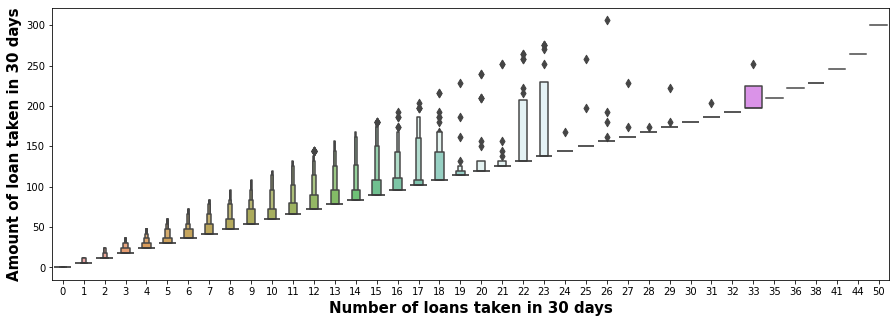

In [53]:
plt.figure(figsize=(15,5))
sns.boxenplot(x="cnt_loans30",y='amnt_loans30', data=df)
plt.xlabel('Number of loans taken in 30 days',fontsize=15,fontweight ='bold')
plt.ylabel('Amount of loan taken in 30 days',fontsize=15,fontweight ='bold')
plt.show()


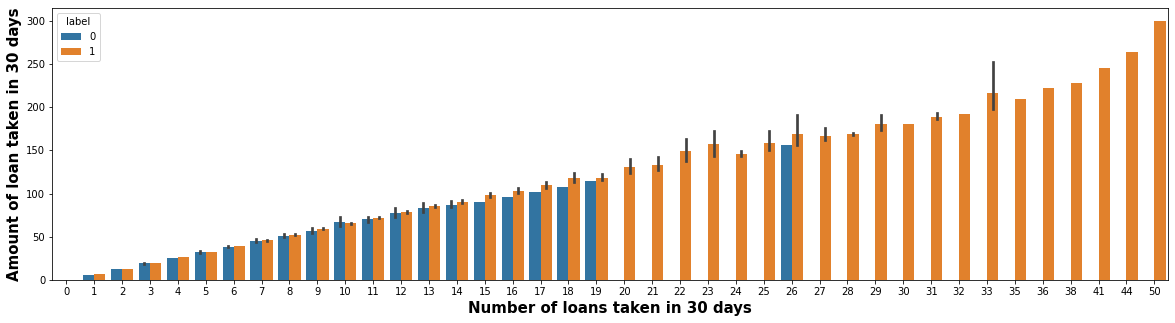

In [54]:
plt.figure(figsize=(20,5))
sns.barplot(x="cnt_loans30",y='amnt_loans30', hue='label', data=df)
plt.xlabel('Number of loans taken in 30 days',fontsize=15,fontweight ='bold')
plt.ylabel('Amount of loan taken in 30 days',fontsize=15,fontweight ='bold')
plt.show()

1. Maximum number of loans taken by the people is 50 and the loan amount is equivalent to 300.
2. Minimum number of loans taken by the people is 0.
3. No defaulter are there if Number of loans taken in 30 days is in 30 to 50.

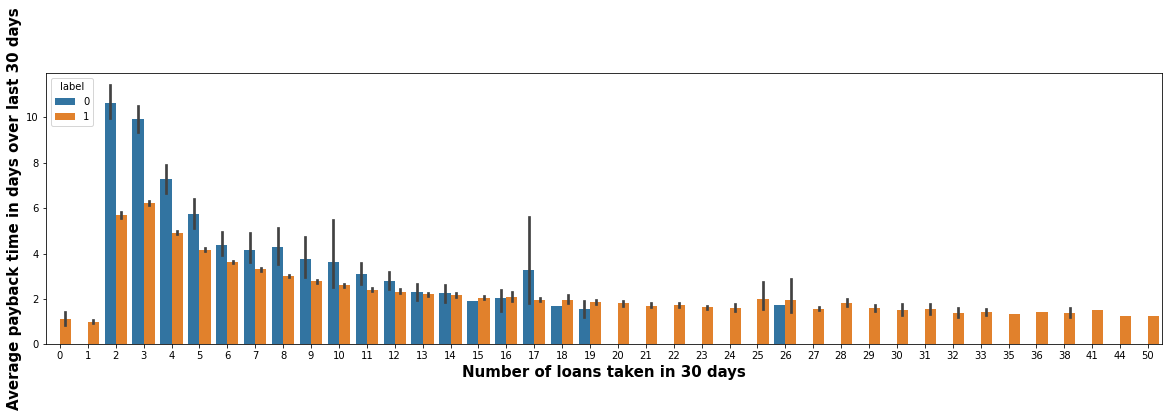

In [55]:
plt.figure(figsize=(20,5))
sns.barplot(x="cnt_loans30",y='payback30', hue='label',  data=df)
plt.xlabel('Number of loans taken in 30 days',fontsize=15,fontweight ='bold')
plt.ylabel('Average payback time in days over last 30 days',fontsize=15,fontweight ='bold')
plt.show()

1. The Average payback time over last 30 days is higher for people who had taken 2 and 3 times the loan in 30 days.
2. The users with less number of loan taking are more the defaulters.
3. If Number of loans taken in 30 days is increased, the defaulters are decreased.

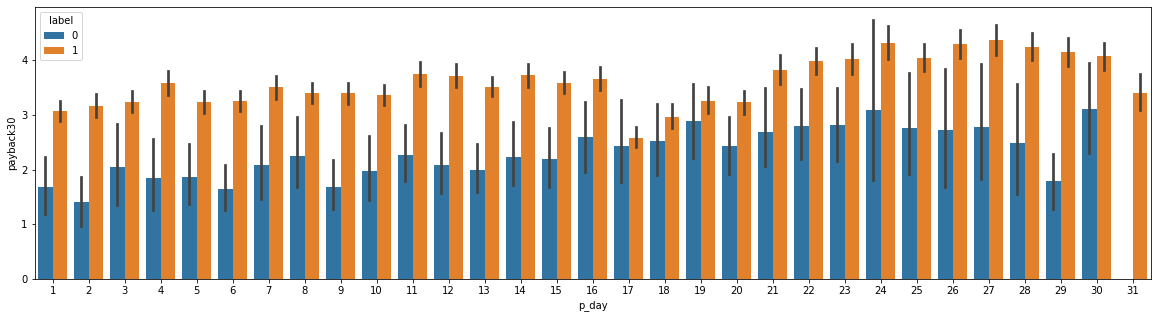

In [56]:
plt.figure(figsize=(20,5))
sns.barplot(x="p_day",y='payback30', hue='label',  data=df)
plt.show()

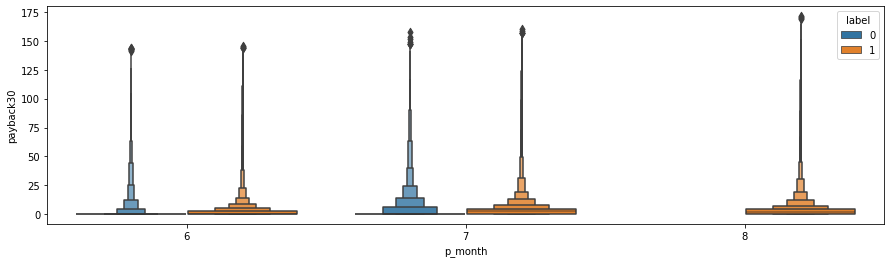

In [57]:
plt.figure(figsize=(15,4))
sns.boxenplot(x="p_month",y='payback30', data=df,  hue='label')
plt.show()

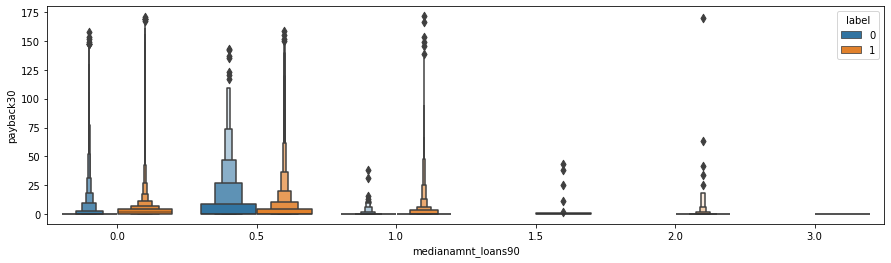

In [58]:
plt.figure(figsize=(15,4))
sns.boxenplot(x="medianamnt_loans90",y='payback30', data=df,  hue='label')
plt.show()

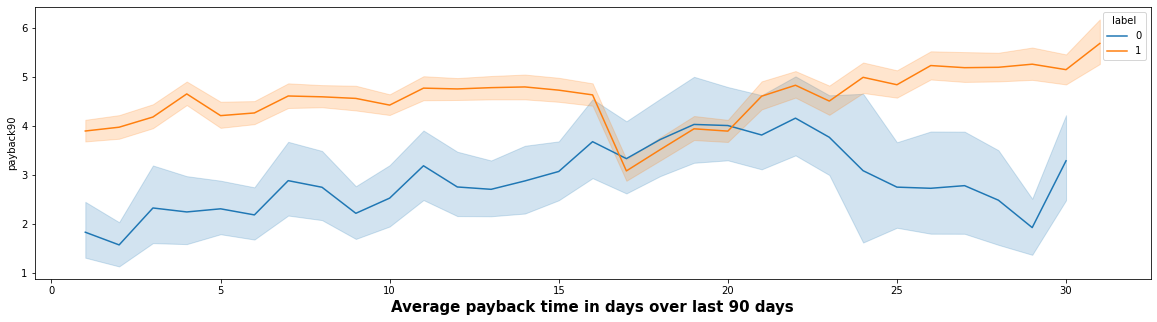

In [59]:
plt.figure(figsize=(20,5))
sns.lineplot(x="p_day",y='payback90', hue='label',  data=df)
plt.xlabel("Average payback time in days over last 90 days",fontsize=15,fontweight ='bold' )
plt.show()

### Encoding categorical data:

In [60]:
df.drop(['msisdn'],axis=1,inplace=True)

no any categorical data is present.

### Outliers Detection and Removal:

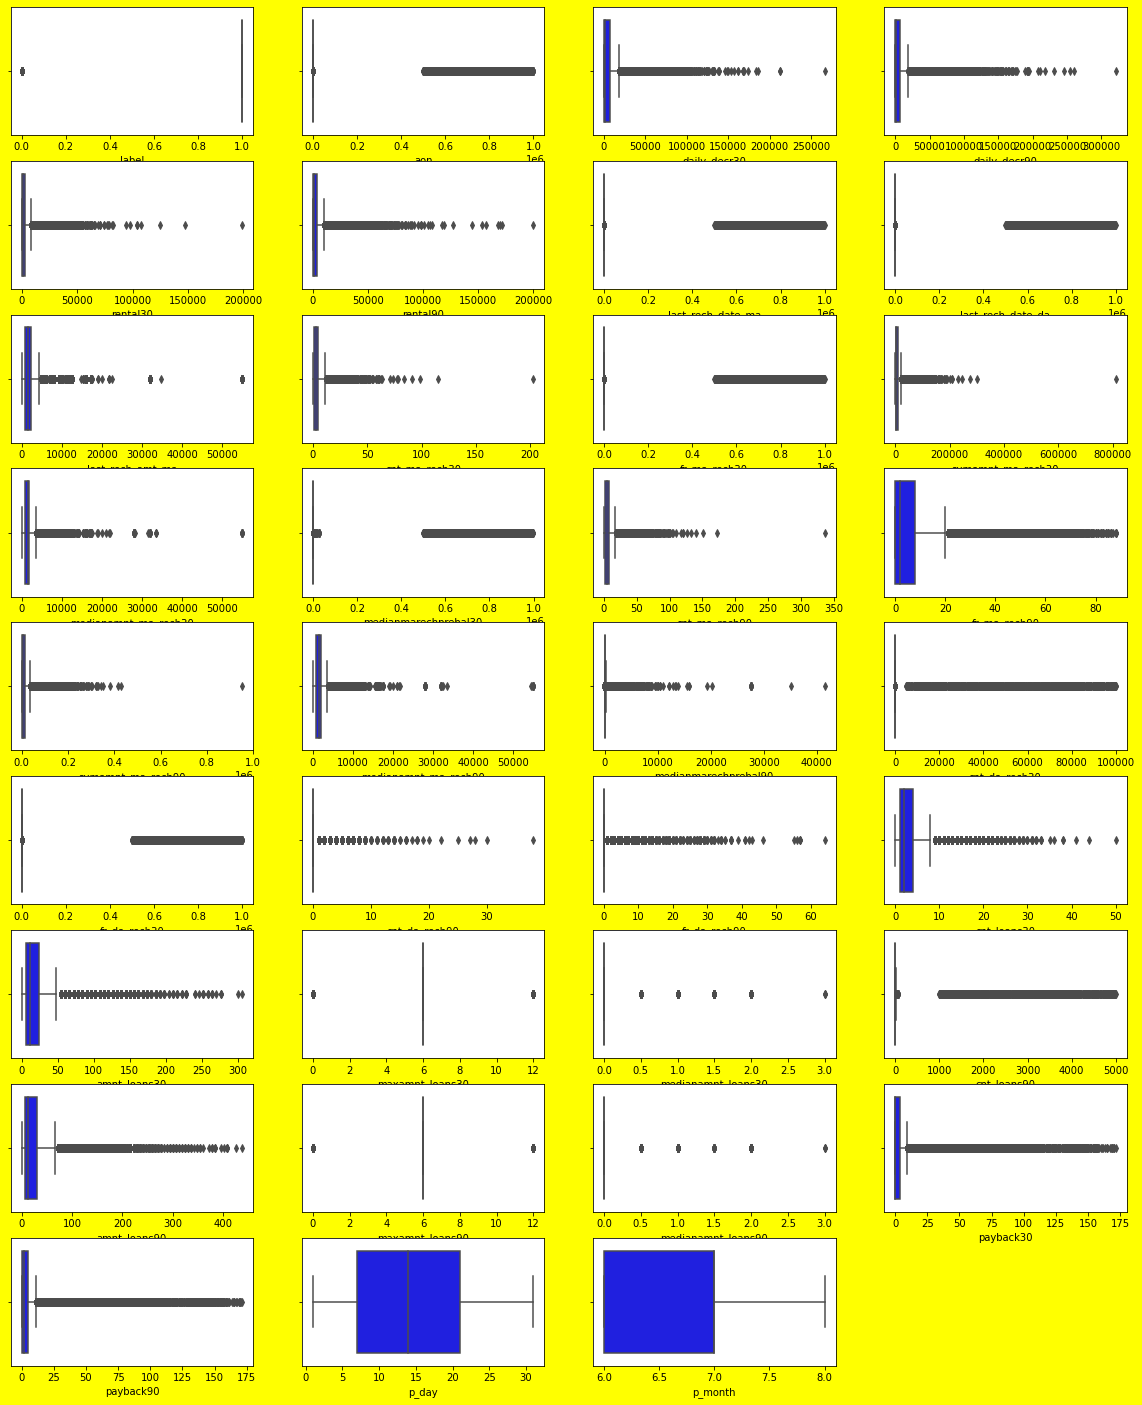

In [61]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for x in df:
    if plotnumber<=35:
        plt.subplot(9,4,plotnumber)
        sns.boxplot(df[x], color='blue')
        plt.xlabel(x)
    plotnumber+=1
plt.show()

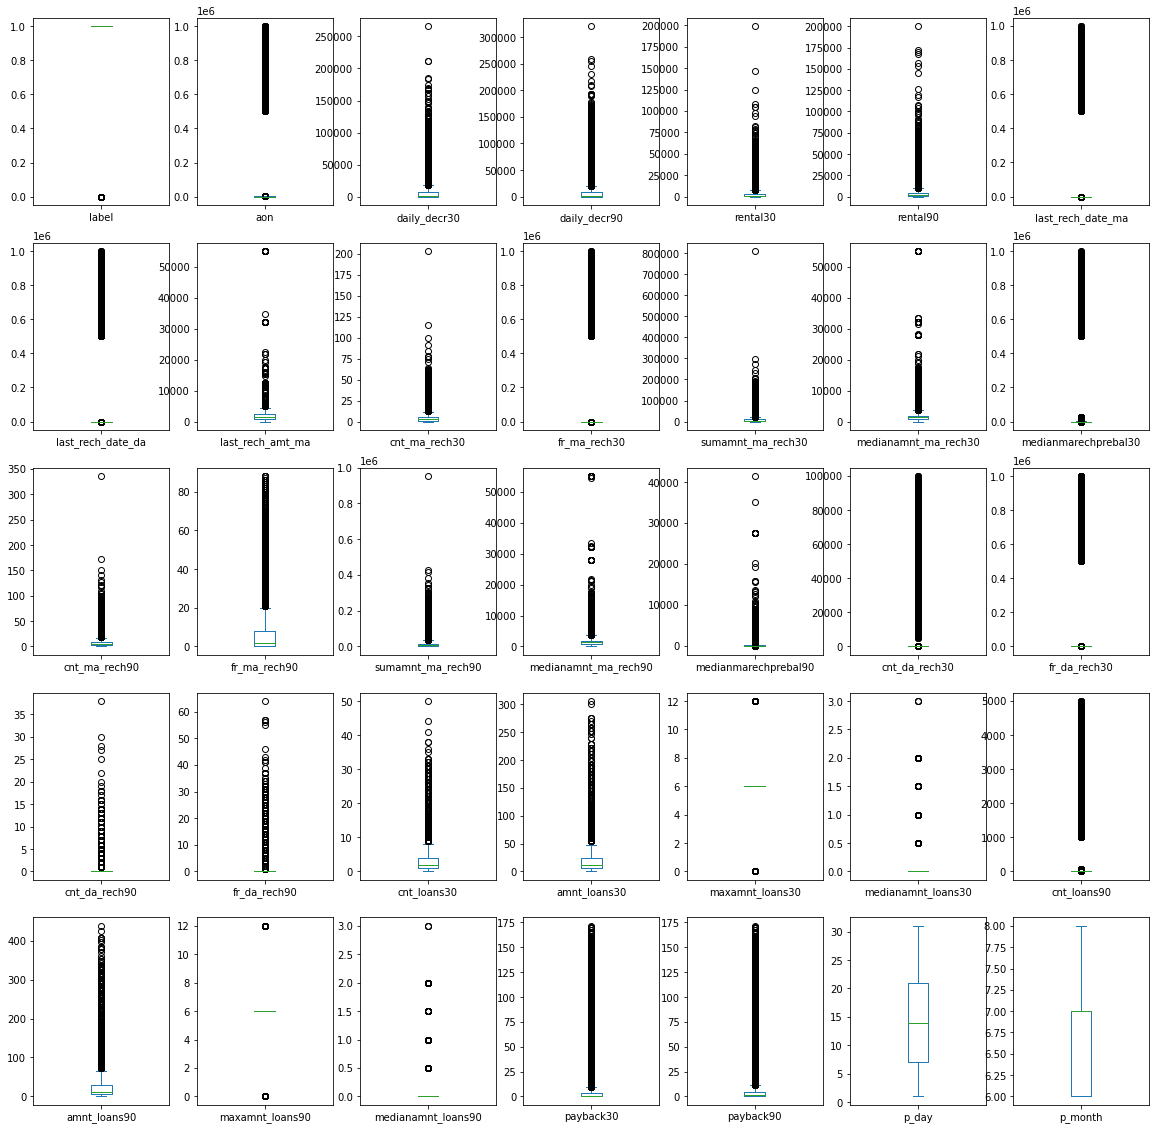

In [62]:
df.plot(kind ='box', subplots =True , layout =(5,7), figsize = (20,20))
plt.show()

From the previous Boxplot , it is seen that there are some outiers in numarical featues columns. Let's remove it. But interestingly there are no outliers in lower capping level.

### Outliers removal by Z score:
Let's take the Z Score =3

Any data with Z Score>3, should to be rejected

In [63]:
data=df.copy()

In [64]:
from scipy.stats import zscore
z = np.abs(zscore(df))

In [65]:
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [66]:
df1 = df[(z<3).all(axis = 1)]
df1.shape

(160499, 35)

In [67]:
print ("Percentage of data loss",((df.shape[0]- df1.shape[0])/df.shape[0])*100, "%")

Percentage of data loss 23.423492196781382 %


### Skewness:

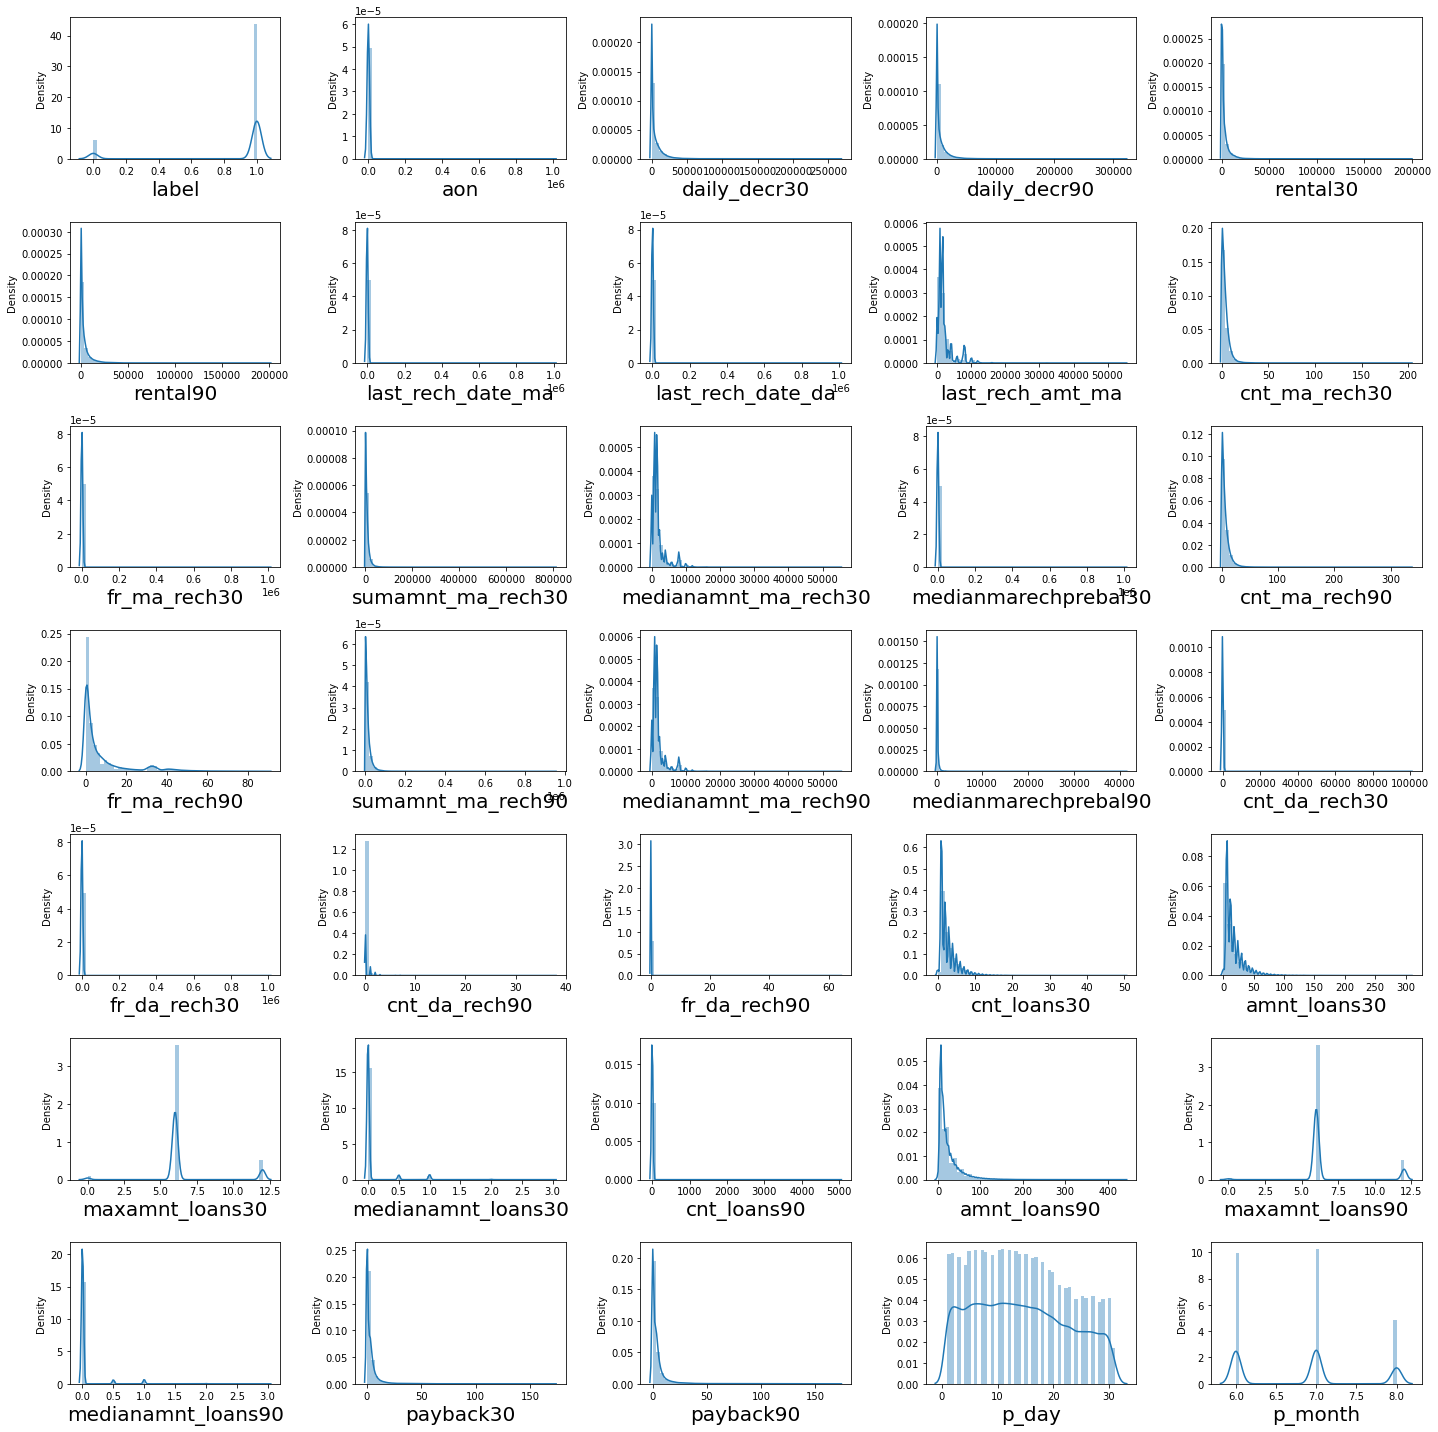

In [68]:
i=0
plt.figure(figsize=(20,20))
for x in df.columns:
    plt.subplot(7,5,i+1)
    sns.distplot(df[x], bins=50)
    plt.xlabel(x,fontsize=20)
    i=i+1
plt.tight_layout()

In [69]:
df.skew().sort_values()

label                   -2.270254
p_day                    0.199845
p_month                  0.343242
maxamnt_loans30          1.241879
maxamnt_loans90          1.678304
fr_ma_rech90             2.285423
cnt_loans30              2.713421
amnt_loans30             2.975719
amnt_loans90             3.150006
cnt_ma_rech30            3.283842
cnt_ma_rech90            3.425254
medianamnt_ma_rech30     3.512324
medianamnt_ma_rech90     3.752706
last_rech_amt_ma         3.781149
daily_decr30             3.946246
daily_decr90             4.252578
rental90                 4.467282
medianamnt_loans30       4.551043
rental30                 4.560510
medianamnt_loans90       4.895720
sumamnt_ma_rech90        4.897950
sumamnt_ma_rech30        6.386787
payback90                6.899951
payback30                8.310695
aon                     10.392951
fr_ma_rech30            14.772833
fr_da_rech30            14.776430
medianmarechprebal30    14.779875
last_rech_date_ma       14.790974
last_rech_date

In [70]:
skew_df= ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_date_ma', 'last_rech_date_da',
            'last_rech_amt_ma','cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30',
            'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30','cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90','maxamnt_loans90', 
            'medianamnt_loans90', 'payback30', 'payback90','p_day', 'p_month']

In [71]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [72]:
df[skew_df] = scaler.fit_transform(df[skew_df].values)
df.skew().sort_values()

label                   -2.270254
aon                     -0.298537
sumamnt_ma_rech30       -0.291322
sumamnt_ma_rech90       -0.192158
medianamnt_ma_rech30    -0.189628
p_day                   -0.156079
daily_decr30            -0.130636
daily_decr90            -0.120627
medianmarechprebal30    -0.119058
last_rech_amt_ma        -0.061262
medianamnt_ma_rech90    -0.044604
rental90                -0.041327
rental30                -0.040537
amnt_loans90            -0.008988
cnt_ma_rech90           -0.002465
cnt_ma_rech30           -0.000145
amnt_loans30             0.001948
last_rech_date_ma        0.012083
cnt_loans30              0.036243
p_month                  0.076431
cnt_loans90              0.105580
fr_ma_rech90             0.142952
fr_ma_rech30             0.165015
payback90                0.210887
payback30                0.298563
maxamnt_loans90          0.364282
maxamnt_loans30          0.422682
medianamnt_loans30       3.447735
medianamnt_loans90       3.779598
last_rech_date

Skewness of most of features is removed.

### Correlation:

In [73]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,p_day,p_month
label,1.000000,0.100319,0.267659,0.270107,0.143026,0.157937,0.079625,0.020975,0.261011,0.344651,...,0.061726,0.046374,0.262117,0.262091,0.069337,0.036232,0.231645,0.239741,0.000319,0.143047
aon,0.100319,1.000000,0.119764,0.120292,0.077761,0.085760,0.066990,0.013855,0.095685,0.051648,...,0.033093,-0.001032,0.126870,0.125857,0.039714,-0.010190,0.098426,0.129049,0.016396,0.087969
daily_decr30,0.267659,0.119764,1.000000,0.998270,0.582161,0.638344,0.136143,0.060969,0.377626,0.497647,...,0.299840,0.008317,0.480241,0.524415,0.321641,-0.029690,0.327555,0.402937,-0.003652,0.845556
daily_decr90,0.270107,0.120292,0.998270,1.000000,0.582339,0.643561,0.140019,0.060431,0.377114,0.492908,...,0.298655,0.009967,0.480625,0.525083,0.322193,-0.029329,0.324904,0.403553,-0.009960,0.856502
rental30,0.143026,0.077761,0.582161,0.582339,1.000000,0.973328,0.070311,0.043006,0.286546,0.454375,...,0.209728,-0.023689,0.388493,0.413669,0.223935,-0.051007,0.306406,0.341667,0.103526,0.431214
rental90,0.157937,0.085760,0.638344,0.643561,0.973328,1.000000,0.102488,0.047151,0.297792,0.445686,...,0.216139,-0.018381,0.401186,0.428696,0.235204,-0.050416,0.302995,0.358326,0.087808,0.515586
last_rech_date_ma,0.079625,0.066990,0.136143,0.140019,0.070311,0.102488,1.000000,0.029991,0.524010,0.016958,...,-0.016534,0.033046,-0.024262,-0.034118,-0.008824,0.026774,-0.075777,-0.005830,0.029421,0.091337
last_rech_date_da,0.020975,0.013855,0.060969,0.060431,0.043006,0.047151,0.029991,1.000000,0.026712,0.010952,...,0.028061,0.003620,0.012617,0.015699,0.028051,0.001635,0.011626,0.028177,0.048676,0.043205
last_rech_amt_ma,0.261011,0.095685,0.377626,0.377114,0.286546,0.297792,0.524010,0.026712,1.000000,0.326579,...,0.132083,0.036401,0.188328,0.198879,0.143627,0.023816,0.143450,0.180065,0.057291,0.162011
cnt_ma_rech30,0.344651,0.051648,0.497647,0.492908,0.454375,0.445686,0.016958,0.010952,0.326579,1.000000,...,0.181036,-0.048268,0.676852,0.686763,0.185520,-0.062674,0.542721,0.487310,0.094661,0.203764


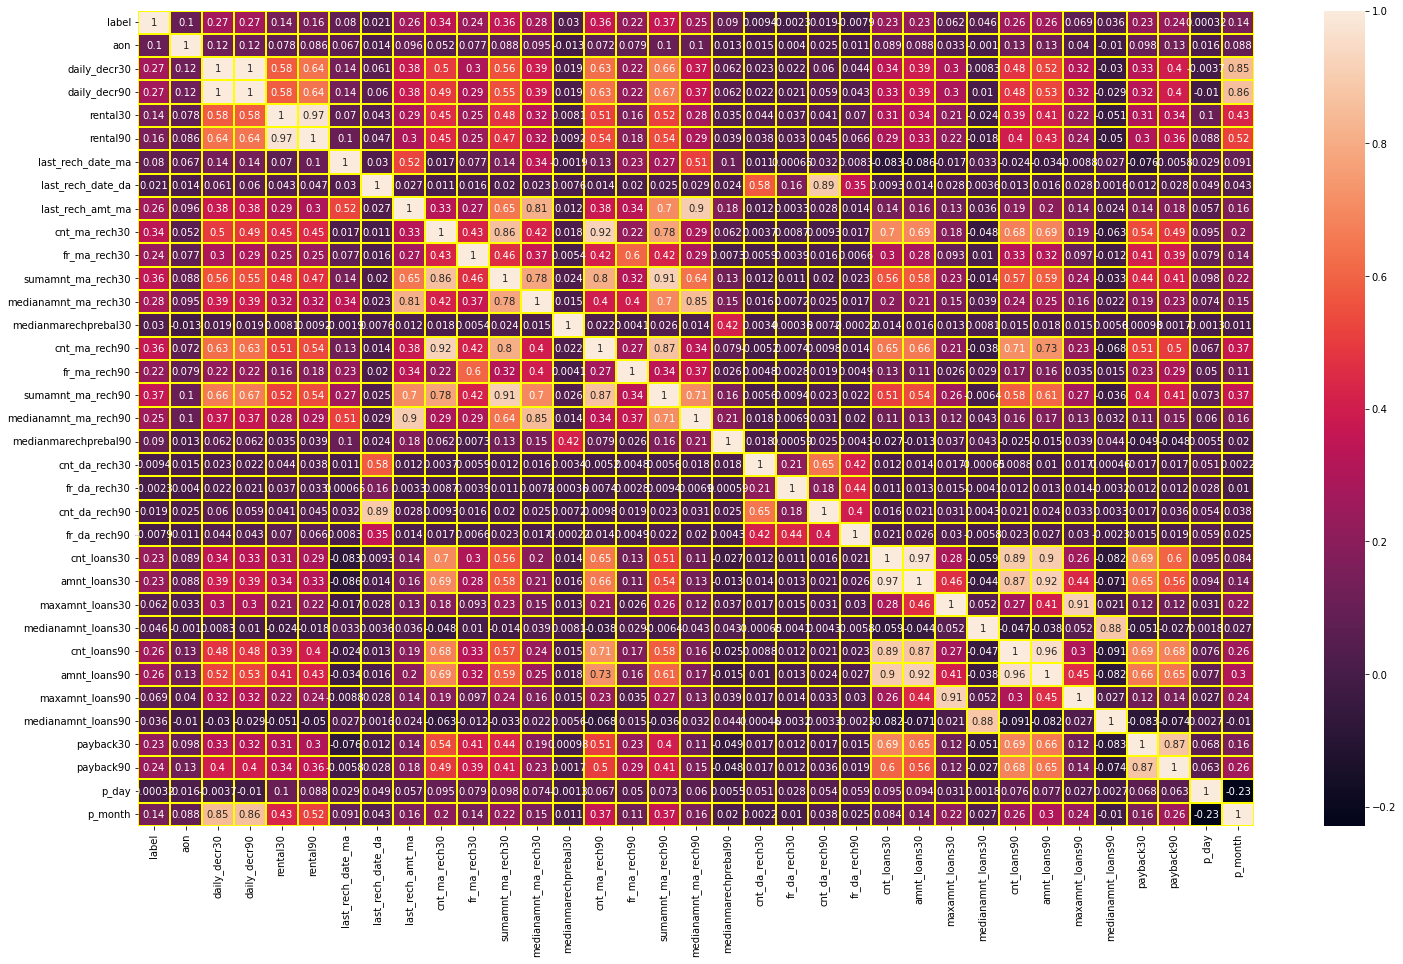

In [74]:
plt.subplots(figsize=(25,15))
sns.heatmap(df.corr(), annot= True, linecolor= "yellow",  linewidths=2)
plt.show()

As are unnecessary columns, let's remove it. It has no correlation with others.

In [75]:
df.drop(['fr_da_rech30','fr_da_rech90' ],axis=1,inplace=True)
df.shape

(209593, 33)

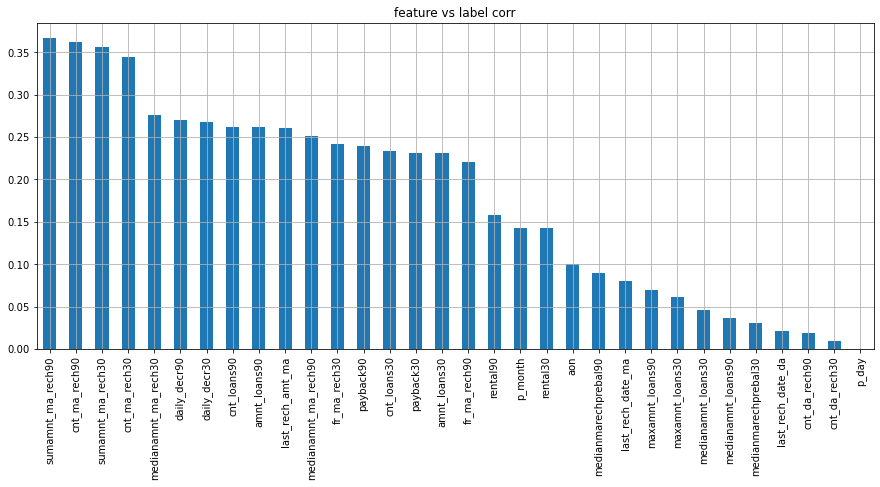

In [76]:
df.drop("label", axis=1).corrwith(df["label"]).sort_values(ascending=False).plot(kind='bar',
        figsize=(15,6),grid='True',title='feature vs label corr')
plt.show()

### Let's balance the target variable label by SMOTE().

In [77]:
df1= df.copy()

In [78]:
df['label'].value_counts() 

1    183431
0     26162
Name: label, dtype: int64

In [79]:
from imblearn.over_sampling import SMOTE
over = SMOTE()

# splitting data in target and dependent feature
x = df.drop(['label'], axis =1)
y = df['label']
x,y = over.fit_resample(x,y)
y.value_counts()

0    183431
1    183431
Name: label, dtype: int64

### Checking Multicollinearity:

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

,VIF,Features
0,1.055174,aon
1,753.353420,daily_decr30
2,823.886333,daily_decr90
3,47.130792,rental30
4,51.737711,rental90
5,2.752810,last_rech_date_ma
6,4.844236,last_rech_date_da
7,12.571655,last_rech_amt_ma
8,86.900386,cnt_ma_rech30
9,2.571268,fr_ma_rech30


### Principal Component Analysis

In [81]:
x1= x.copy()

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

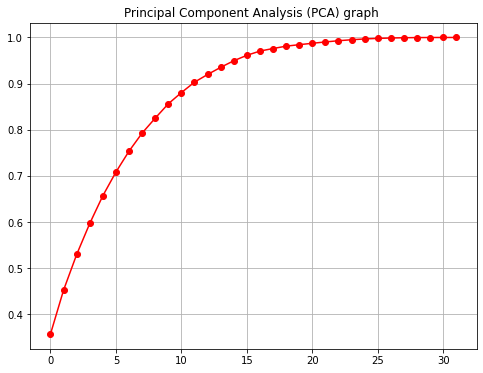

In [83]:
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title('Principal Component Analysis (PCA) graph ')
plt.grid()

In [84]:
pca_new = PCA(n_components=13)
x_scale_new = pca_new.fit_transform(x_scale)
prin_x=pd.DataFrame(x_scale_new )

### Final predictions using different Classification ML Models :
Find best Random state:

In [85]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(500, 1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.7608596101007458 on Random_state 954


In [86]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (275146, 13)
Training target shape: (275146,)
Test feature shape: (91716, 13)
Test target shape: (91716,)


### 1. Using LogisticRegression():

In [87]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state= 979)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.756312966112783
cof_mat:
  [[34659 11409]
 [10941 34707]]
classification report:
                precision    recall  f1-score   support

           0       0.76      0.75      0.76     46068
           1       0.75      0.76      0.76     45648

    accuracy                           0.76     91716
   macro avg       0.76      0.76      0.76     91716
weighted avg       0.76      0.76      0.76     91716

-----------
-----------
training score :  0.7575541712399962
testing score :  0.756312966112783


### 2. Using DecisionTreeClassifier()

In [88]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.8686052597147716


cof_mat:  [[40891  5177]
 [ 6874 38774]]


classification report: 

               precision    recall  f1-score   support

           0       0.86      0.89      0.87     46068
           1       0.88      0.85      0.87     45648

    accuracy                           0.87     91716
   macro avg       0.87      0.87      0.87     91716
weighted avg       0.87      0.87      0.87     91716

-----------
-----------
training score :  0.9999818278295887
testing score :  0.8686052597147716


### 3. Using GradientBoostingClassifier():

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.7949648916219635


cof_mat:  [[36413  9655]
 [ 9150 36498]]


classification report: 

               precision    recall  f1-score   support

           0       0.80      0.79      0.79     46068
           1       0.79      0.80      0.80     45648

    accuracy                           0.79     91716
   macro avg       0.79      0.79      0.79     91716
weighted avg       0.80      0.79      0.79     91716

-----------
-----------
training score :  0.7976492480355883
testing score :  0.7949648916219635


### 4. Using RandomForestClassifier()

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.9295978891360286


cof_mat:  [[43627  2441]
 [ 4016 41632]]


classification report:                precision    recall  f1-score   support

           0       0.92      0.95      0.93     46068
           1       0.94      0.91      0.93     45648

    accuracy                           0.93     91716
   macro avg       0.93      0.93      0.93     91716
weighted avg       0.93      0.93      0.93     91716

-----------
-----------
training score :  0.9999781933955064
testing score :  0.9295978891360286


### 5. ExtraTreesClassifier():

In [91]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.9450477561167081


cof_mat:  [[44230  1838]
 [ 3202 42446]]


classification report:                precision    recall  f1-score   support

           0       0.93      0.96      0.95     46068
           1       0.96      0.93      0.94     45648

    accuracy                           0.95     91716
   macro avg       0.95      0.94      0.95     91716
weighted avg       0.95      0.95      0.95     91716

-----------
-----------
training score :  0.9999818278295887
testing score :  0.9450477561167081


### 6. Using AdaBoostClassifier:

In [92]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))

accu score :  0.7712176719438266


cof_mat:  [[35233 10835]
 [10148 35500]]


classification report:                precision    recall  f1-score   support

           0       0.78      0.76      0.77     46068
           1       0.77      0.78      0.77     45648

    accuracy                           0.77     91716
   macro avg       0.77      0.77      0.77     91716
weighted avg       0.77      0.77      0.77     91716

-----------
-----------
training score :  0.7742253203753644
testing score :  0.7712176719438266


### Cross Validtion:

In [93]:
from sklearn.model_selection import cross_val_score


all_models = [log, clf, gbdt, rf, etc, ada ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale_new,y, cv =5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression()

 Cross Validation Score :  [0.75642266 0.75721314 0.75785041 0.75715532 0.75708717]

Mean CV Score : 0.7571457405118953

Std deviation : 0.0004533124658086574

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier()

 Cross Validation Score :  [0.87252804 0.87169667 0.87748732 0.87630159 0.87447528]

Mean CV Score : 0.8744977805573928

Std deviation : 0.002187129225152116

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier()

 Cross Validation Score :  [0.7920761  0.79645101 0.79907867 0.79850624 0.7976476 ]

Mean CV Score : 0.7967519257288479

Std deviation : 0.002499897979817615

-----------
-----------
Cross Validation Score of : RandomForestClassifier()

 Cross Validation Score :  [0.93257738 0.93591648 0.93478439 0.93553399 0.93528867]

Mean CV Score : 0.9348201807396279

Std deviation : 0.001180027276047062

-----------
-----------
Cross Validation Score of : ExtraTreesClassifier()


### Hyper Parameter Tuning:

In [157]:
from sklearn.model_selection import GridSearchCV
params = { 'criterion' : ["gini", "entropy","log_loss"] }

etc_grd = GridSearchCV(etc, param_grid = params, cv=3)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'criterion': 'log_loss'}


In [158]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.9442518208382398


cof_mat:  [[44229  1839]
 [ 3274 42374]]


classification report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     46068
           1       0.96      0.93      0.94     45648

    accuracy                           0.94     91716
   macro avg       0.94      0.94      0.94     91716
weighted avg       0.94      0.94      0.94     91716

-----------
-----------
training score :  0.9999818278295887
testing score :  0.9442518208382398


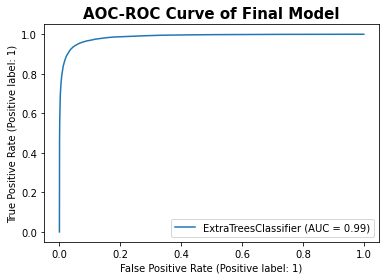

Final AUC Score is: 

 0.9441790011053929


In [159]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(grid_etc_best,x_test,y_test)   
plt.title('AOC-ROC Curve of Final Model',fontsize=15,fontweight='bold')
plt.show()
auc_score = roc_auc_score(y_test, grid_etc_best.predict(x_test))
print('Final AUC Score is: \n\n',auc_score)

### Final Model:

In [160]:
y_pred = grid_etc_best.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### confusion matrix

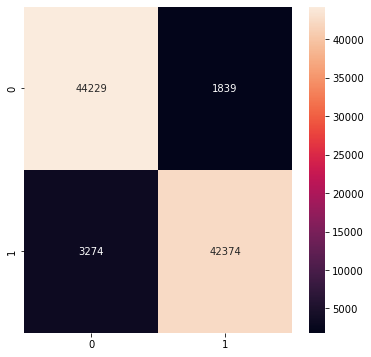

In [161]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()


### Load the model:

In [142]:
import pickle
pickle.dump(grid_etc_best, open("Micro_Credit_Defaulter_Classification_model", "wb"))
load_Micro_Credit_Defaulter_Classification_model= pickle.load(open("Micro_Credit_Defaulter_Classification_model", "rb"))

In [143]:
y_pred = load_Micro_Credit_Defaulter_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

,Predicted Values,Actual Values
88850,1,1
56891,1,1
60594,0,1
20156,1,1
64999,1,1
35042,0,0
